In [64]:
%pip install pytrends

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pytrends

In [4]:
transactions_url = "/content/drive/MyDrive/Personal project/Sao ke ung ho/transactions.csv"
keywords_url = "/content/drive/MyDrive/Personal project/Sao ke ung ho/keywords.csv"

In [98]:
transactions_csv = pd.read_csv(transactions_url, index_col=0)
transactions_csv['Value'] = transactions_csv['Value'].replace({'[,\.]': ''}, regex=True).dropna().astype(int)
transactions_csv

,Date,Code,Value,Description
0,2024-09-01,5213.459,50000.000,292976.010924.013647.xin cam on
1,2024-09-01,5090.858,20000.000,VCB.CTDK.31/03/2024.ADIDA PHAT. CT tu 04810007...
2,2024-09-01,5241.831,29000.000,MBVCB.6916176124.CAO VIET TUAN chuyen tien.CT ...
3,2024-09-01,5218.871,3000.000,272986.010924.101858.DO DUC LOI chuyen tien
4,2024-09-01,5388.967,3000.000,020097040509011046122024JDC5013867.96713 .1046...
...,...,...,...,...
258841,2024-09-12,NaN,200000.000,Chuyen tien den tu NAPAS Noi dung: NGUYEN XUAN...
258842,2024-09-12,NaN,127600.000,CT nhanh 247 den: Ung ho dong bao thiet hai do...
258843,2024-09-12,NaN,400000.000,CT nhanh 247 den: Vietinbank;CT1111;Ung ho don...
258844,2024-09-12,NaN,500000.000,CT nhanh 247 den: MBVCB.7018038922.693816.Quyn...


In [99]:
def format_int_with_commas(x):
    """
    Formats an integer with commas as thousand separators.
    """
    return f"{x:,}"
transactions_csv.describe().map(format_int_with_commas)

,Code,Value
count,"200,364.0","258,837.0"
mean,"5,244.122003933791","1,529,590.7920428687"
std,98.1845952997371,"310,277,717.8158226"
min,1.45,3.0
25%,"5,213.171362499999","100,000.0"
50%,"5,218.836685","200,000.0"
75%,"5,245.188450000001","500,000.0"
max,"9,920.246","111,602,391,111.0"


In [100]:
max_transaction=transactions_csv.loc[transactions_csv['Value'].idxmax()]
print(max_transaction)
print("Người gửi nhiều nhất: ",max_transaction['Description'])
print("Số tiền: ",)

Date                                                  2024-09-11
Code                                                         NaN
Value                                           111602391111.000
Description    66611452856-0905912874-tien cuu tro Chi ho Con...
Name: 218828, dtype: object
Người gửi nhiều nhất:  66611452856-0905912874-tien cuu tro Chi ho Cong ty Vi MoMo – A/C


In [101]:
transaction_frequency = transactions_csv.groupby(['Date']).size().reset_index(name='frequency')
transaction_frequency

,Date,frequency
0,2024-09-01,14
1,2024-09-02,5
2,2024-09-03,9
3,2024-09-04,42
4,2024-09-05,32
5,2024-09-06,34
6,2024-09-07,59
7,2024-09-08,503
8,2024-09-09,6279
9,2024-09-10,194864


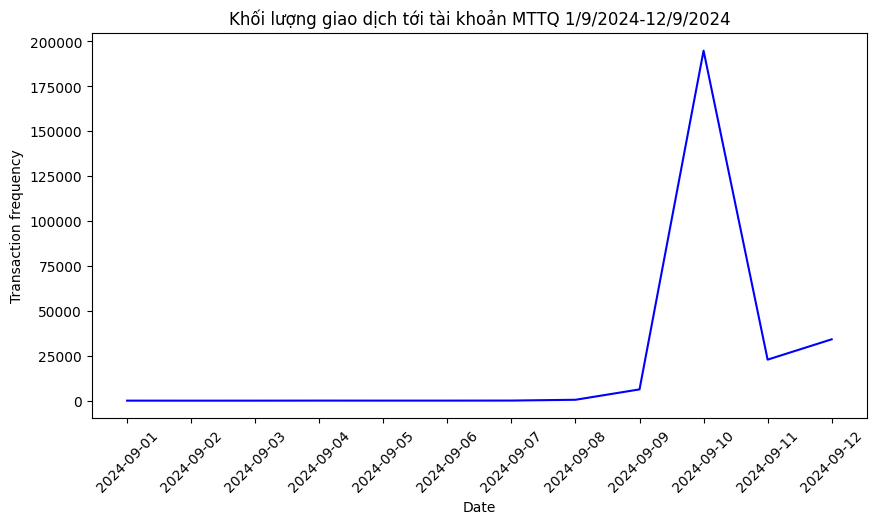

In [126]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.title("Khối lượng giao dịch tới tài khoản MTTQ 1/9/2024-12/9/2024")
plt.plot(transaction_frequency['Date'], transaction_frequency['frequency'], color='blue')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Transaction frequency")
plt.show()

In [103]:
trending_terms_csv = pd.read_csv(keywords_url)
trending_terms_csv

,Title,Search Volume,Link,Geo Location,Type
0,bão yagi,28200,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
1,cử tạ paralympics,11750,https://trends.google.com/trends/explore?q=c%E...,VN,search_topic
2,bão số 3,10350,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
3,quần vợt xe lăn paralympics,7000,https://trends.google.com/trends/explore?q=qu%...,VN,search_topic
4,cưỡi ngựa paralympics 2024,5950,https://trends.google.com/trends/explore?q=c%C...,VN,search_topic
5,cử tạ paralympics 2024,5850,https://trends.google.com/trends/explore?q=c%E...,VN,search_topic
6,môn quần vợt xe lăn tại thế vận hội dành cho n...,5350,https://trends.google.com/trends/explore?q=m%C...,VN,search_topic
7,thế vận hội dành cho người khuyết tật năm 2024,4050,https://trends.google.com/trends/explore?q=th%...,VN,search_topic
8,bão,3550,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
9,ngày quốc khánh việt nam,3300,https://trends.google.com/trends/explore?q=ng%...,VN,search_topic


<ipython-input-104-515a282950d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_terms_csv['Title'],y= trending_terms_csv['Search Volume'],palette='Blues_d')


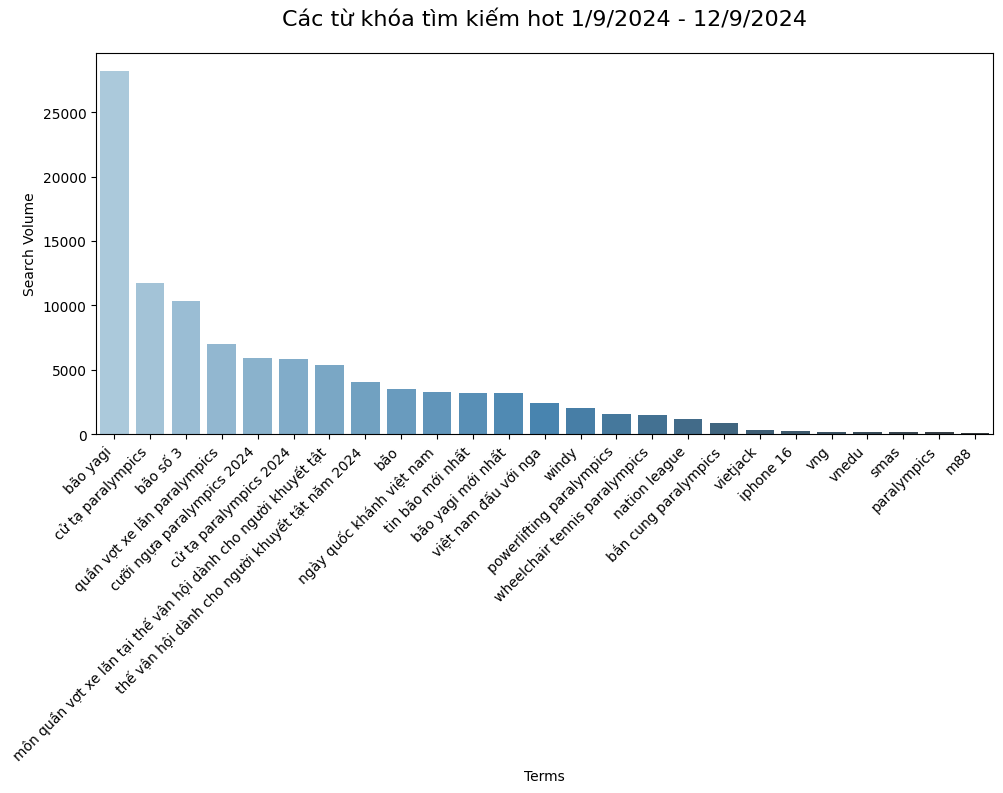

In [104]:
plt.figure(figsize=(10, 5))

# creating the bar plot
plt.title('Các từ khóa tìm kiếm hot 1/9/2024 - 12/9/2024', fontsize=16, pad=20)
sns.barplot(x=trending_terms_csv['Title'],y= trending_terms_csv['Search Volume'],palette='Blues_d')
plt.xlabel("Terms")
plt.ylabel("Search Volume")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
top_3_treding_terms = trending_terms_csv.nlargest(3, 'Search Volume')
top_3_treding_terms

,Title,Search Volume,Link,Geo Location,Type
0,bão yagi,28200,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic
1,cử tạ paralympics,11750,https://trends.google.com/trends/explore?q=c%E...,VN,search_topic
2,bão số 3,10350,https://trends.google.com/trends/explore?q=b%C...,VN,search_topic


In [106]:
# Get interest rate for each term over time
from pytrends.request import TrendReq
trend_terms_dfs = []
for i in top_3_treding_terms['Title'].tolist():
  pytrends = TrendReq(hl='en-US', tz=420)
  kw_list = [i]
  pytrends.build_payload(kw_list, cat=0, timeframe=['2024-09-01 2024-09-13'],geo="VN")
  data = pytrends.interest_over_time()
  trend_terms_dfs.append(data)

In [113]:
trend_terms_dfs[2].columns[]

Index(['bão số 3', 'isPartial'], dtype='object')

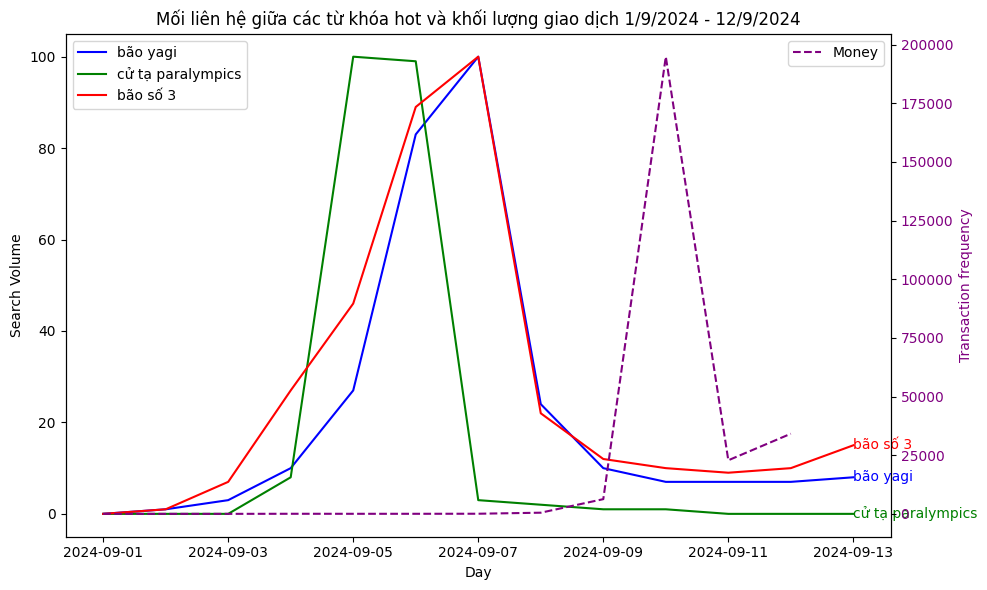

In [128]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the search volume on the first y-axis
ax1.plot(trend_terms_dfs[0].index, trend_terms_dfs[0][trend_terms_dfs[0].columns[0]], label=trend_terms_dfs[0].columns[0],color='b')
ax1.plot(trend_terms_dfs[1].index, trend_terms_dfs[1][trend_terms_dfs[1].columns[0]], label=trend_terms_dfs[1].columns[0], color='g')
ax1.plot(trend_terms_dfs[2].index, trend_terms_dfs[2][trend_terms_dfs[2].columns[0]], label=trend_terms_dfs[2].columns[0], color='r')

ax1.set_xlabel('Day')
ax1.set_ylabel('Search Volume')
ax1.tick_params(axis='y')

# Create a second y-axis
ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis

# Plot the money on the second y-axis
ax2.plot(pd.to_datetime(transaction_frequency['Date']), transaction_frequency['frequency'], color='purple', label='Money',linestyle='--')
ax2.set_ylabel('Transaction frequency', color='purple')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='purple')

# Add labels directly on the lines
max_date = trend_terms_dfs[0].index.max()
ax1.text(max_date, trend_terms_dfs[0][trend_terms_dfs[0].columns[0]].iloc[-1], trend_terms_dfs[0].columns[0], color='b', fontsize=10, ha='left', va='center')
ax1.text(max_date, trend_terms_dfs[1][trend_terms_dfs[1].columns[0]].iloc[-1], trend_terms_dfs[1].columns[0], color='g', fontsize=10, ha='left', va='center')
ax1.text(max_date, trend_terms_dfs[2][trend_terms_dfs[2].columns[0]].iloc[-1], trend_terms_dfs[2].columns[0], color='r', fontsize=10, ha='left', va='center')


# Add titles and legends
ax1.set_title('Mối liên hệ giữa các từ khóa hot và khối lượng giao dịch 1/9/2024 - 12/9/2024')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
